My first question when I went exploring the data from my capstone project was whether the relationships betwen variables in my data aligned with my expectations.  I checked this with a heatmap of correlation coefficients.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
hd = pd.DataFrame.from_csv('clean.csv', index_col=0)
hd.head()

,age,sex,cp_1,cp_2,cp_3,cp_4,trestbps,chol,fbs,restecg_0,...,exang,oldpeak,slope_1,slope_2,slope_3,ca,thal_3,thal_6,thal_7,pred
0,63,1,1,0,0,0,145,233,1,0,...,0,2.3,0,0,1,0,0,1,0,0
1,67,1,0,0,0,1,160,286,0,0,...,1,1.5,0,1,0,3,1,0,0,1
2,67,1,0,0,0,1,120,229,0,0,...,1,2.6,0,1,0,2,0,0,1,1
3,37,1,0,0,1,0,130,250,0,1,...,0,3.5,0,0,1,0,1,0,0,0
4,41,0,0,1,0,0,130,204,0,0,...,0,1.4,1,0,0,0,1,0,0,0


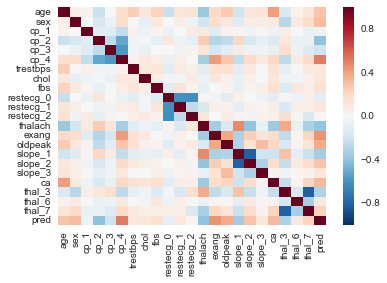

In [5]:
cr = hd.corr()
sns.heatmap(cr)

A few things popped out to me.  My categorical data was strongly negatively correlated with itself (as it should be.  A 1 in one of those columns should always mean a 0 in the others).

Age is negatively correlated with thalach (the heartrate achieved during an excercise test), which aligns with expectations.  Peak heartrate decreases as people age.

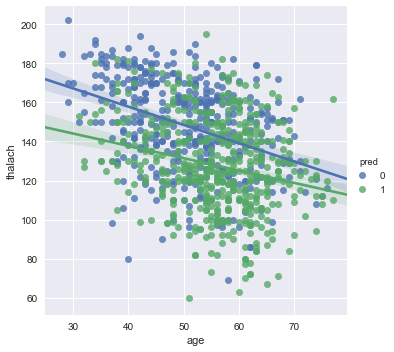

In [7]:
sns.lmplot(x = 'age', y = 'thalach', data = hd, hue = 'pred')

The graph above also illustrates some of the difference between patients with heart disease (1) and those without (0).  Patients with heart disease were, on average, not able to attain as high of a heartrate, with the difference being more pronounced for younger patients.

Some of the correlations from the heatmap make less sense.  Thal_3 and slope_1 (both of which are "normal" test results for those tests) are both negatively correlated with heart disease, but cp_4 (no chest pain) has one of the strongest positive correlations on the map.  There's a strong link between cp_4 and exang (exercise induced angina), though, leading me to believe that patients in the cp_4 category are only in this dataset to begin with because of some other symptom, and that's making it appear as if cp_4 is a good explanatory variable. A survey of data from the general population might cause that association to erode.

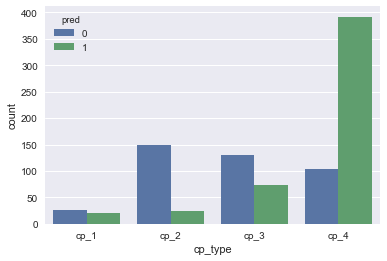

In [13]:
cp = hd[['cp_1', 'cp_2', 'cp_3', 'cp_4', 'pred']]

cp = pd.melt(cp, id_vars="pred", var_name="cp_type", value_name="value")
cp = cp[cp.value == 1]
cp = cp.drop('value', axis = 1)
sns.countplot(x = 'cp_type', data = cp, hue = 'pred')

In contrast, the presence of some form of chest pain is likely enough to refer a patient over to a cardiology specialist, regardless of any other risk factors.  Counterintuitively, the cp_2 category (atypical angina) might be the most accurate reflection of the general public that we have in the dataset.

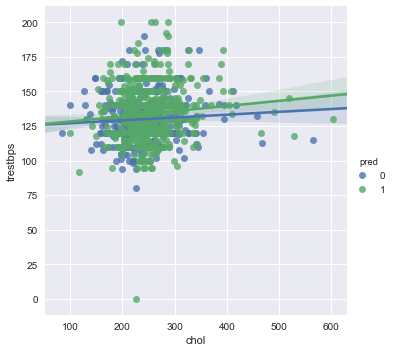

In [14]:
sns.lmplot(x = 'chol', y = 'trestbps', data = hd, hue = 'pred')

Finally, the above graph shows something I wasn't expecting.  The differnce between the blood pressure and cholesterol for patients with heart disease is not dramatically different from patients without heart disease.  I thought there was going to be more here, since my "I am not a doctor" level understanding of heart disease mostly centers around clogged arteries and hypertenison.